Dalam analisis ini, saya mengeksplorasi Tingkat Kegemaran Membaca (TGM) di Indonesia dari 2020 hingga 2023, menggunakan data yang telah melalui proses preprocessing untuk mengatasi missing values dan outliers. Fokus utama analisis ini adalah memahami faktor-faktor yang mempengaruhi minat baca, seperti frekuensi membaca, durasi membaca, akses internet, dan jumlah bahan bacaan per kuartal. Dengan visualisasi data yang tepat, saya ingin mengungkap pola tersembunyi, tren dari tahun ke tahun, serta hubungan antara internet dan kebiasaan membaca, sehingga dapat memberikan insight yang lebih dalam terkait literasi masyarakat Indonesia.

In [2]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [10]:
# Import dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/Dataset/TGM_2020-2023_imputed.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load dataset
df = pd.read_csv(file_path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   provinsi                                    140 non-null    object 
 1   year                                        140 non-null    int64  
 2   reading_frequency_per_week                  140 non-null    float64
 3   number_of_readings_per_quarter              140 non-null    float64
 4   daily_reading_duration_in_minutes           140 non-null    float64
 5   internet_access_frequency_per_week          140 non-null    float64
 6   daily_internet_duration_in_minutes          140 non-null    float64
 7   tingkat_kegemaran_membaca_reading_interest  140 non-null    float64
 8   category                                    140 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 10.0+ KB


<ipython-input-13-47a5098fddb0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="tingkat_kegemaran_membaca_reading_interest", estimator="mean", ci=None, marker="o", color="b")


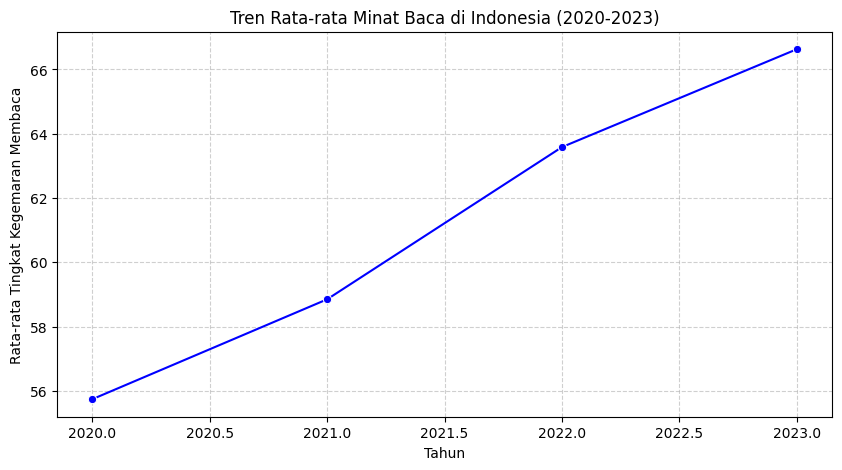

In [13]:
# Tren Minat Baca dari Tahun ke Tahun
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="year", y="tingkat_kegemaran_membaca_reading_interest", estimator="mean", ci=None, marker="o", color="b")
plt.title("Tren Rata-rata Minat Baca di Indonesia (2020-2023)")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Tingkat Kegemaran Membaca")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Plot ini menunjukkan tren peningkatan rata-rata tingkat kegemaran membaca di Indonesia dari 2020 hingga 2023. Terlihat bahwa minat baca masyarakat terus naik setiap tahunnya, dengan lonjakan signifikan pada 2022. Peningkatan ini mengindikasikan adanya perubahan dalam kebiasaan membaca, namun faktor-faktor yang memengaruhi tren ini perlu dianalisis lebih lanjut untuk memastikan apakah pertumbuhan ini merata di seluruh wilayah atau dipengaruhi oleh kondisi tertentu.

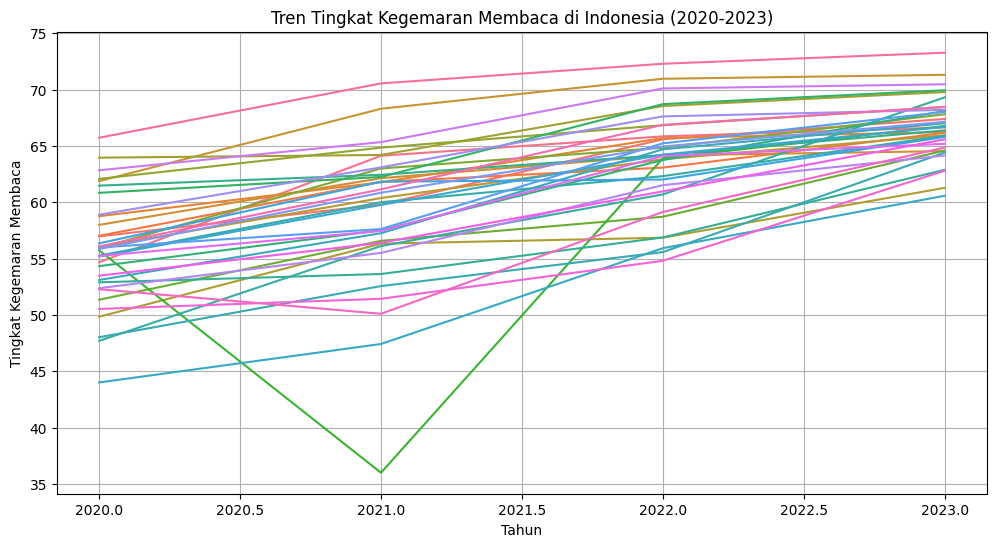

In [15]:
# Tren Kebiasaan Membaca Per Provinsi di Indonesia (2020-2023)
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="year", y="tingkat_kegemaran_membaca_reading_interest", hue="provinsi", legend=False)
plt.title("Tren Tingkat Kegemaran Membaca di Indonesia (2020-2023)")
plt.xlabel("Tahun")
plt.ylabel("Tingkat Kegemaran Membaca")
plt.grid(True)
plt.show()


Plot ini menampilkan tren tingkat kegemaran membaca di setiap provinsi dari 2020 hingga 2023. Meskipun ada beberapa fluktuasi di beberapa daerah, secara umum terlihat bahwa sebagian besar provinsi mengalami peningkatan dalam minat baca. Tidak semua provinsi memiliki tren yang sama, dengan beberapa menunjukkan pertumbuhan stabil, sementara lainnya mengalami kenaikan atau penurunan tajam pada tahun tertentu. Keterangan per provinsi tidak ditampilkan karena jumlahnya yang banyak, sehingga visualisasi ini lebih berfokus pada pola umum dibandingkan detail per wilayah.

In [16]:
# Sebaran Kebiasaan Membaca antar Provinsi
import plotly.express as px

fig = px.choropleth(df[df["year"] == 2023],
                    locations="provinsi",
                    locationmode="country names",
                    color="tingkat_kegemaran_membaca_reading_interest",
                    title="Sebaran Kebiasaan Membaca di Indonesia (2023)",
                    color_continuous_scale="viridis")

fig.show()


Plot ini menunjukkan sebaran tingkat kegemaran membaca di Indonesia pada tahun 2023 dalam bentuk peta interaktif. Warna pada peta menunjukkan variasi tingkat kegemaran membaca, dengan skala warna dari ungu (nilai lebih rendah) hingga kuning (nilai lebih tinggi). Dari visualisasi ini, terlihat bahwa beberapa daerah memiliki tingkat kegemaran membaca yang lebih tinggi dibandingkan wilayah lainnya. Peta ini memungkinkan eksplorasi lebih lanjut dengan fitur zoom, yang berguna untuk melihat detail per wilayah secara lebih spesifik. Dengan analisis lebih mendalam, faktor-faktor yang memengaruhi variasi ini, seperti akses terhadap bahan bacaan, fasilitas literasi, dan budaya membaca di tiap daerah, dapat dieksplorasi lebih lanjut.

<ipython-input-17-694072f33d38>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




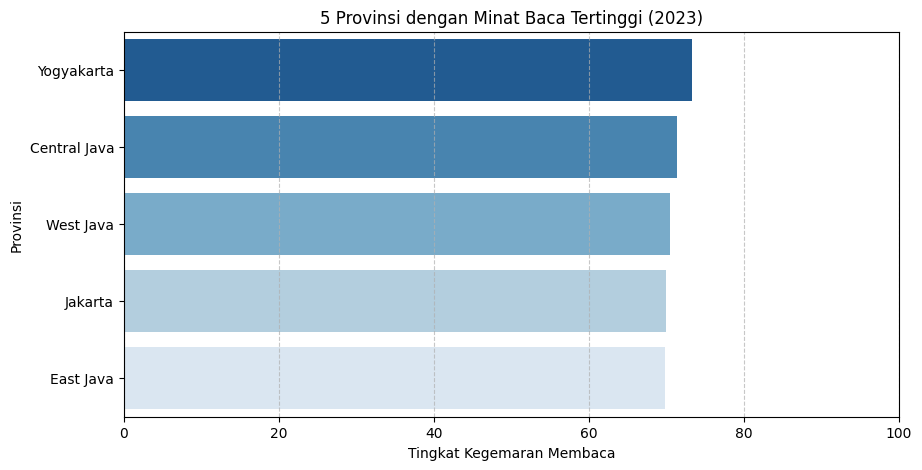

<ipython-input-17-694072f33d38>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




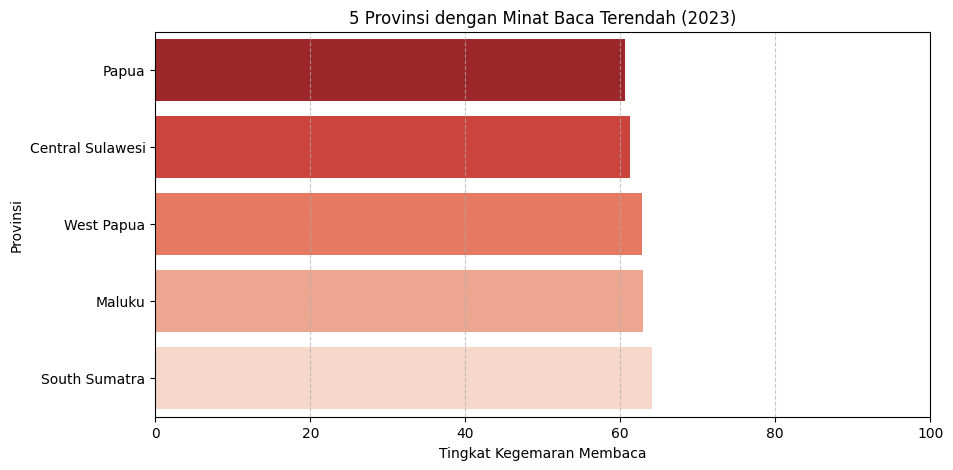

In [17]:
# Provinsi dengan Minat Baca Tertinggi dan Terendah
df_2023 = df[df["year"] == 2023]  # Ambil data tahun 2023

# Ambil 5 provinsi dengan minat baca tertinggi & terendah
top5 = df_2023.nlargest(5, "tingkat_kegemaran_membaca_reading_interest")
bottom5 = df_2023.nsmallest(5, "tingkat_kegemaran_membaca_reading_interest")

# # Plot 5 Provinsi Tertinggi
plt.figure(figsize=(10,5))
sns.barplot(data=top5, x="tingkat_kegemaran_membaca_reading_interest", y="provinsi", palette="Blues_r")
plt.title("5 Provinsi dengan Minat Baca Tertinggi (2023)")
plt.xlabel("Tingkat Kegemaran Membaca")
plt.ylabel("Provinsi")
plt.xlim(0, 100)  # Sesuaikan skala agar lebih jelas
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Plot 5 Provinsi Terendah
plt.figure(figsize=(10,5))
sns.barplot(data=bottom5, x="tingkat_kegemaran_membaca_reading_interest", y="provinsi", palette="Reds_r")
plt.title("5 Provinsi dengan Minat Baca Terendah (2023)")
plt.xlabel("Tingkat Kegemaran Membaca")
plt.ylabel("Provinsi")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Lima provinsi dengan minat baca tertinggi pada 2023 adalah Yogyakarta, Jawa Tengah, Jawa Barat, Jakarta, dan Jawa Timur, sedangkan lima terendah adalah Papua, Sulawesi Tengah, Papua Barat, Maluku, dan Sumatera Selatan. Perbedaan ini mencerminkan variasi tingkat kegemaran membaca di berbagai wilayah Indonesia, yang dapat dipengaruhi oleh berbagai faktor seperti akses terhadap bahan bacaan dan kebiasaan literasi masyarakat setempat.

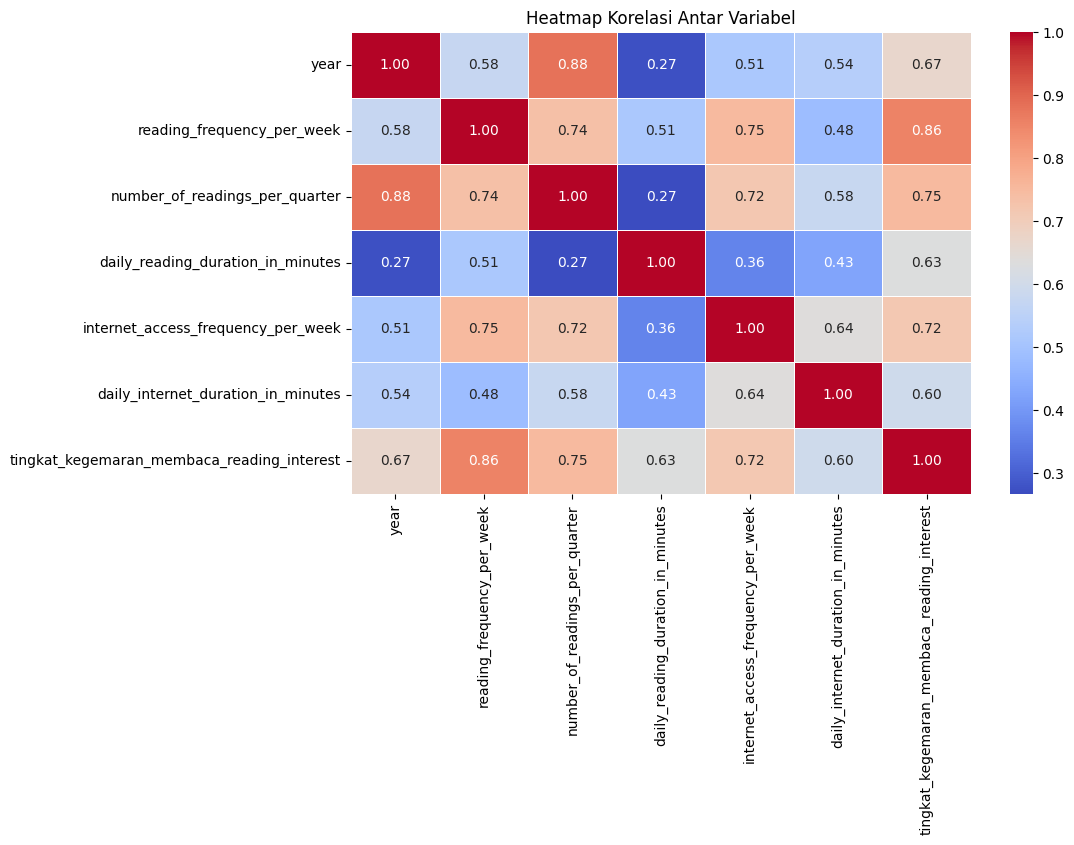

In [23]:
# Heatmap Korelasi Antar Variabel

# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung korelasi antar variabel numerik
corr_matrix = numeric_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


Plot ini merupakan heatmap yang menunjukkan korelasi antar variabel dalam dataset terkait kebiasaan membaca. Warna dalam heatmap menunjukkan kekuatan hubungan antar variabel, dengan warna merah mengindikasikan korelasi positif yang kuat dan warna biru menunjukkan korelasi yang lebih lemah.

Beberapa temuan utama dari heatmap ini:
Tingkat kegemaran membaca memiliki korelasi tinggi dengan frekuensi membaca per minggu (0.86) dan jumlah bacaan per kuartal (0.75), yang menunjukkan bahwa semakin sering seseorang membaca, semakin tinggi pula tingkat kegemaran membacanya.

Frekuensi akses internet per minggu (0.72) juga memiliki korelasi yang cukup kuat dengan tingkat kegemaran membaca, yang mengindikasikan bahwa akses internet mungkin berperan dalam meningkatkan minat baca.

Durasi membaca harian dalam menit (0.63) memiliki korelasi sedang dengan tingkat kegemaran membaca, menunjukkan bahwa meskipun waktu membaca penting, frekuensi membaca tampaknya lebih berpengaruh terhadap minat baca secara keseluruhan.

Jumlah bacaan per kuartal (0.88) memiliki korelasi tinggi dengan tahun, yang mungkin menunjukkan adanya peningkatan jumlah bacaan secara bertahap dari waktu ke waktu.

Secara keseluruhan, heatmap ini membantu dalam memahami hubungan antar variabel dan menunjukkan bahwa faktor seperti frekuensi membaca dan akses internet berperan penting dalam meningkatkan kegemaran membaca di Indonesia.


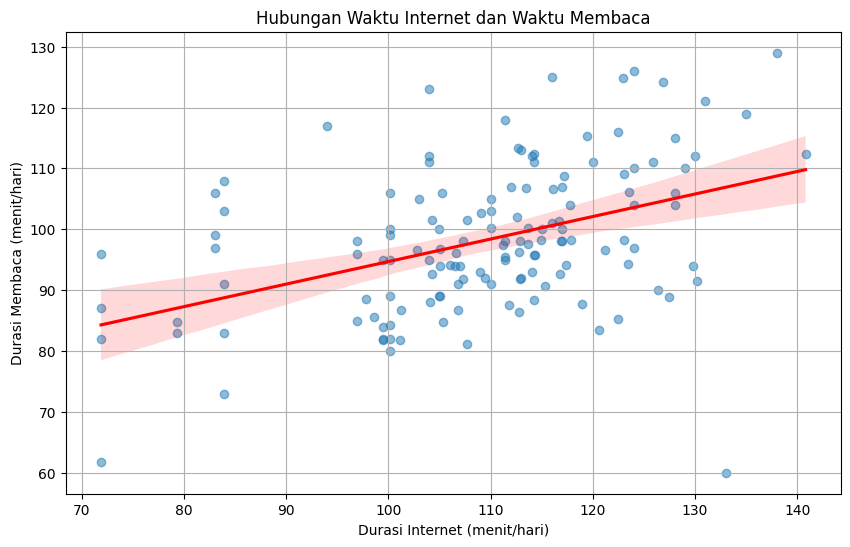

In [18]:
# Hubungan Waktu Internet dan Waktu Membaca
plt.figure(figsize=(10,6))
sns.regplot(x=df["daily_internet_duration_in_minutes"],
            y=df["daily_reading_duration_in_minutes"],
            scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Hubungan Waktu Internet dan Waktu Membaca")
plt.xlabel("Durasi Internet (menit/hari)")
plt.ylabel("Durasi Membaca (menit/hari)")
plt.grid(True)
plt.show()


Plot ini menunjukkan hubungan antara durasi penggunaan internet dan durasi membaca dalam satuan menit per hari. Dari hasil regresi yang ditampilkan dengan garis merah, terlihat adanya hubungan positif antara kedua variabel, meskipun dengan sebaran data yang cukup bervariasi.

Secara umum, tren ini mengindikasikan bahwa semakin lama seseorang menggunakan internet, semakin lama pula waktu yang mereka habiskan untuk membaca. Namun, hubungan ini tidak sepenuhnya kuat karena terdapat banyak data yang tersebar di sekitar garis tren, menunjukkan adanya faktor lain yang mungkin memengaruhi kebiasaan membaca seseorang di samping penggunaan internet.

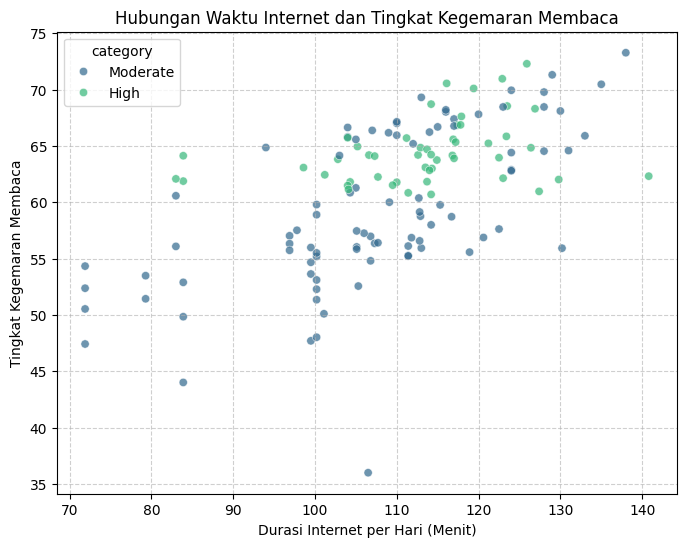

In [20]:
# Hubungan Waktu Internet dengan Tingkat Kegemaran Membaca
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="daily_internet_duration_in_minutes", y="tingkat_kegemaran_membaca_reading_interest", hue="category", palette="viridis", alpha=0.7)
plt.title("Hubungan Waktu Internet dan Tingkat Kegemaran Membaca")
plt.xlabel("Durasi Internet per Hari (Menit)")
plt.ylabel("Tingkat Kegemaran Membaca")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Plot ini menunjukkan hubungan antara durasi penggunaan internet per hari dan tingkat kegemaran membaca, dengan kategori "Moderate" dan "High" yang ditandai dengan warna berbeda. Secara umum, terlihat bahwa individu dengan durasi internet yang lebih tinggi cenderung memiliki tingkat kegemaran membaca yang lebih tinggi. Namun, sebaran data cukup bervariasi, menunjukkan bahwa meskipun ada pola hubungan positif, faktor lain kemungkinan turut memengaruhi tingkat kegemaran membaca. Beberapa individu dengan durasi internet yang lebih rendah juga masih menunjukkan tingkat kegemaran membaca yang tinggi, sehingga perlu analisis lebih lanjut terkait faktor lain seperti jenis konten yang diakses atau kebiasaan membaca secara keseluruhan.

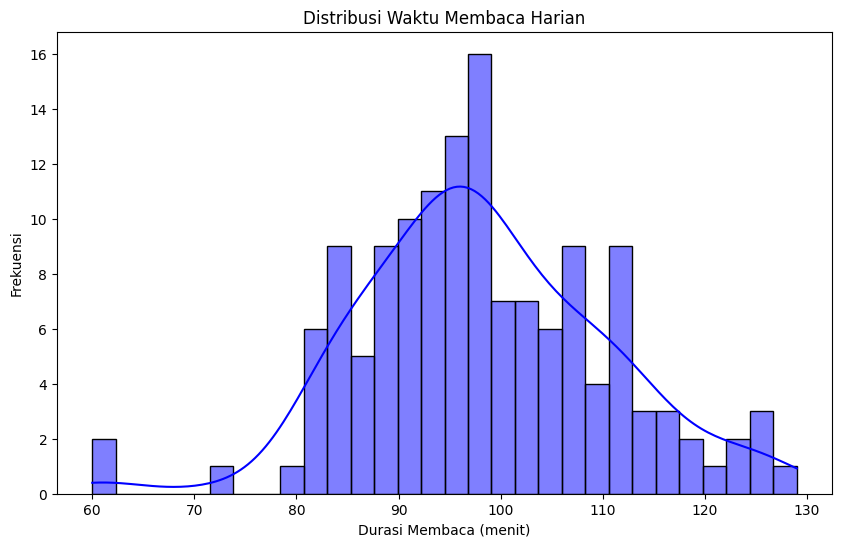

In [21]:
# Distribusi Durasi Membaca & Internet
plt.figure(figsize=(10,6))
sns.histplot(df["daily_reading_duration_in_minutes"], bins=30, kde=True, color="blue")
plt.title("Distribusi Waktu Membaca Harian")
plt.xlabel("Durasi Membaca (menit)")
plt.ylabel("Frekuensi")
plt.show()


Plot ini menunjukkan distribusi durasi membaca harian dalam satuan menit. Dari histogram yang ditampilkan, dapat terlihat bahwa mayoritas individu memiliki waktu membaca yang berkisar antara 80 hingga 110 menit per hari. Distribusi data menunjukkan pola yang mendekati distribusi normal dengan sedikit kemencengan ke kanan, mengindikasikan bahwa terdapat beberapa individu yang memiliki durasi membaca lebih tinggi dibandingkan rata-rata.

Kurva KDE (Kernel Density Estimation) yang ditampilkan dengan garis biru memberikan gambaran yang lebih halus mengenai pola distribusi data. Puncak distribusi berada di sekitar 100 menit, yang menunjukkan bahwa nilai ini merupakan durasi membaca yang paling umum. Namun, terdapat juga beberapa individu yang memiliki kebiasaan membaca lebih singkat maupun lebih lama dari rentang umum tersebut. Hal ini menunjukkan adanya variasi dalam kebiasaan membaca di masyarakat.

<ipython-input-24-3f0f82f715de>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




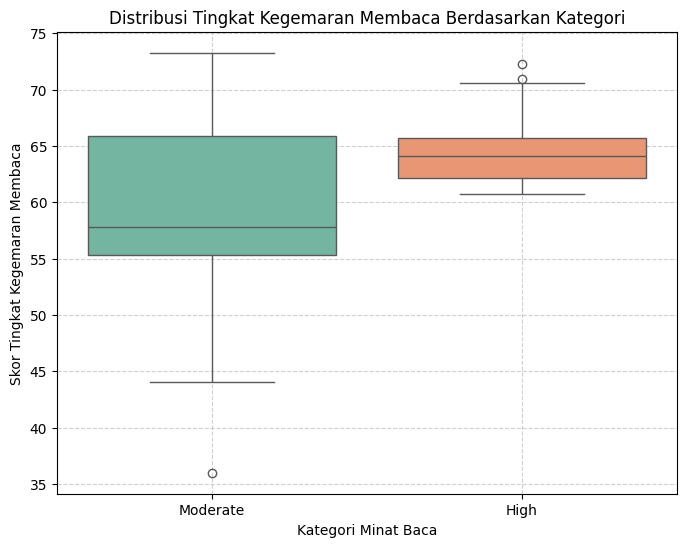

In [24]:
# Distribusi Minat Baca per Kategori
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="category", y="tingkat_kegemaran_membaca_reading_interest", palette="Set2")
plt.title("Distribusi Tingkat Kegemaran Membaca Berdasarkan Kategori")
plt.xlabel("Kategori Minat Baca")
plt.ylabel("Skor Tingkat Kegemaran Membaca")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Plot ini adalah boxplot yang menunjukkan distribusi tingkat kegemaran membaca berdasarkan kategori minat baca (Moderate dan High). Beberapa hal yang bisa diamati dari visualisasi ini:
Kategori "High" memiliki distribusi yang lebih rapat dibandingkan kategori "Moderate", yang berarti skor kegemaran membaca lebih terpusat pada nilai tertentu.

Kategori "Moderate" memiliki variasi yang lebih besar dibandingkan "High", terlihat dari panjang box dan whisker yang lebih panjang.

Median skor kegemaran membaca kategori "High" lebih tinggi dibandingkan kategori "Moderate", yang sesuai dengan ekspektasi.

Ada beberapa outlier terutama di kategori "Moderate", yang menunjukkan adanya individu dengan tingkat kegemaran membaca yang jauh lebih rendah dibandingkan yang lain.

Secara keseluruhan, boxplot ini memberikan gambaran jelas bahwa kategori "High" memiliki tingkat kegemaran membaca yang lebih stabil dan tinggi, sementara kategori "Moderate" lebih bervariasi dan memiliki beberapa skor yang jauh lebih rendah.

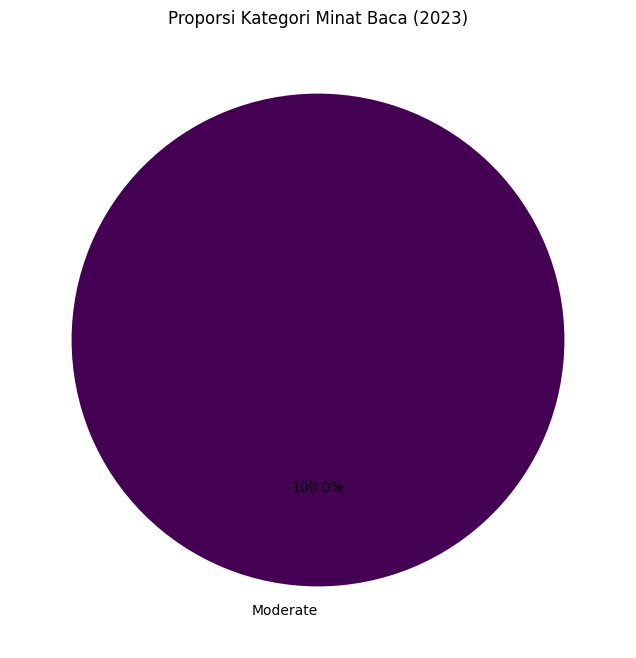

In [26]:
# Kategori Minat Baca (Moderate, High, Very High) 2023
plt.figure(figsize=(8,8))
df_2023["category"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.title("Proporsi Kategori Minat Baca (2023)")
plt.ylabel("")  # Hilangkan label y
plt.show()


Plot ini adalah pie chart yang menunjukkan proporsi kategori minat baca di tahun 2023. Dari visualisasi ini, terlihat bahwa seluruh responden di tahun 2023 masuk dalam kategori "Moderate", tanpa ada kategori lain seperti "High" atau "Very High".

Hal ini menunjukkan bahwa berdasarkan data yang dikumpulkan, tidak ada individu yang memiliki tingkat minat baca yang sangat tinggi atau sangat rendah di tahun 2023. Ini bisa disebabkan oleh beberapa faktor, misalnya:
Homogenitas Responden – Jika data dikumpulkan dari kelompok dengan karakteristik serupa (misalnya usia, tingkat pendidikan, atau lokasi), mungkin mereka memiliki pola minat baca yang cenderung sama.

Kategori Minat Baca – Mungkin ada perubahan dalam cara kategorisasi minat baca di tahun 2023 dibandingkan dengan tahun sebelumnya, sehingga semua individu masuk ke dalam kategori "Moderate".

Perubahan Kebiasaan Membaca – Bisa jadi ada tren di mana mayoritas individu berada pada tingkat membaca yang sedang, tanpa ada yang menonjol ke ekstrem rendah atau tinggi.

Secara keseluruhan, pie chart ini mengonfirmasi bahwa di tahun 2023, tidak ada variasi dalam kategori minat baca, dan semua individu tergolong dalam kategori "Moderate".